In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Volve production data.xlsx')
                  
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

In [ ]:
df.describe()

,NPD_WELL_BORE_CODE,NPD_FIELD_CODE,NPD_FACILITY_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,15634.000000,15634.0,15634.0,15349.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.000000,15340.000000,9161.000000,9161.000000,9161.000000,5706.000000
mean,5908.581745,3420717.0,369304.0,19.994093,181.803869,77.162969,154.028787,14.856100,55.168533,45.377811,67.728440,11.441060,1095.631548,161049.059703,1672.151332,5315.480815
std,649.231622,0.0,0.0,8.369978,109.712363,45.657948,76.752373,8.406822,36.692924,24.752631,27.719028,19.816928,1323.538151,188136.410434,1706.982853,2181.486695
min,5351.000000,3420717.0,369304.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000,0.000000
25%,5599.000000,3420717.0,369304.0,24.000000,0.000000,0.000000,83.665361,10.841437,18.952989,31.148062,56.577834,0.000000,190.690000,29430.590000,19.870000,4338.204674
50%,5693.000000,3420717.0,369304.0,24.000000,232.896939,103.186689,175.588861,16.308598,52.096877,37.933620,80.071250,2.384969,557.550000,87749.660000,1097.790000,5504.739769
75%,5769.000000,3420717.0,369304.0,24.000000,255.401455,106.276591,204.319964,21.306125,99.924288,57.101268,88.062202,13.765020,1345.200000,202482.300000,3260.950000,6781.058040
max,7405.000000,3420717.0,369304.0,25.000000,397.588550,108.502178,345.906770,30.019828,100.000000,137.311030,93.509584,125.718570,5901.840000,851131.520000,8019.740000,10013.600000


In [ ]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,NPD_WELL_BORE_CODE,NPD_FIELD_CODE,NPD_FACILITY_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
NPD_WELL_BORE_CODE,1.000000,NaN,NaN,-0.102270,0.257481,0.339509,0.218243,0.141756,-0.558461,0.077946,-0.519515,0.237647,-0.307645,-0.310793,-0.493591,-0.055894
NPD_FIELD_CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NPD_FACILITY_CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ON_STREAM_HRS,-0.102270,NaN,NaN,1.000000,-0.003092,0.105931,0.002824,0.482779,0.531331,-0.044900,0.763229,-0.229295,0.342031,0.353713,0.405123,0.749544
AVG_DOWNHOLE_PRESSURE,0.257481,NaN,NaN,-0.003092,1.000000,0.967826,0.949734,-0.124023,-0.262804,0.283359,-0.095114,0.267649,0.248571,0.245981,-0.296765,NaN
AVG_DOWNHOLE_TEMPERATURE,0.339509,NaN,NaN,0.105931,0.967826,1.000000,0.898954,-0.087189,-0.295764,0.274247,-0.076801,0.221986,0.289819,0.287328,-0.343581,NaN
AVG_DP_TUBING,0.218243,NaN,NaN,0.002824,0.949734,0.898954,1.000000,-0.110382,-0.162100,0.102476,-0.054496,0.093282,0.126964,0.125475,-0.171882,NaN
AVG_ANNULUS_PRESS,0.141756,NaN,NaN,0.482779,-0.124023,-0.087189,-0.110382,1.000000,0.155142,-0.003255,0.316138,-0.178271,-0.025095,-0.028252,0.094019,NaN
AVG_CHOKE_SIZE_P,-0.558461,NaN,NaN,0.531331,-0.262804,-0.295764,-0.162100,0.155142,1.000000,-0.398607,0.752825,-0.551193,0.029671,0.039699,0.760294,NaN
AVG_WHP_P,0.077946,NaN,NaN,-0.044900,0.283359,0.274247,0.102476,-0.003255,-0.398607,1.000000,-0.041366,0.908623,0.430498,0.428589,-0.328853,NaN


In [ ]:
print(df['WELL_BORE_CODE'].value_counts())

NO 15/9-F-4 AH    3327
NO 15/9-F-5 AH    3306
NO 15/9-F-12 H    3056
NO 15/9-F-14 H    3056
NO 15/9-F-11 H    1165
NO 15/9-F-15 D     978
NO 15/9-F-1 C      746
Name: WELL_BORE_CODE, dtype: int64


In [ ]:
print(df['NPD_WELL_BORE_CODE'].value_counts())

5693    3327
5769    3306
5599    3056
5351    3056
7078    1165
7289     978
7405     746
Name: NPD_WELL_BORE_CODE, dtype: int64


In [ ]:
well4 = df['NPD_WELL_BORE_CODE'] == 5599
df_well4 = df[well4]
print(df_well4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3056 entries, 1911 to 4966
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3056 non-null   object        
 2   NPD_WELL_BORE_CODE        3056 non-null   int64         
 3   NPD_WELL_BORE_NAME        3056 non-null   object        
 4   NPD_FIELD_CODE            3056 non-null   int64         
 5   NPD_FIELD_NAME            3056 non-null   object        
 6   NPD_FACILITY_CODE         3056 non-null   int64         
 7   NPD_FACILITY_NAME         3056 non-null   object        
 8   ON_STREAM_HRS             3056 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 11  AVG_DP_TUBING             3050 non-null   float64       
 12  AVG_ANNULUS_PRESS

In [ ]:
print(df)

         DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0     2014-04-07   NO 15/9-F-1 C                7405         15/9-F-1 C   
1     2014-04-08   NO 15/9-F-1 C                7405         15/9-F-1 C   
2     2014-04-09   NO 15/9-F-1 C                7405         15/9-F-1 C   
3     2014-04-10   NO 15/9-F-1 C                7405         15/9-F-1 C   
4     2014-04-11   NO 15/9-F-1 C                7405         15/9-F-1 C   
...          ...             ...                 ...                ...   
15629 2016-09-14  NO 15/9-F-5 AH                5769           15/9-F-5   
15630 2016-09-15  NO 15/9-F-5 AH                5769           15/9-F-5   
15631 2016-09-16  NO 15/9-F-5 AH                5769           15/9-F-5   
15632 2016-09-17  NO 15/9-F-5 AH                5769           15/9-F-5   
15633 2016-09-18  NO 15/9-F-5 AH                5769           15/9-F-5   

       NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0             3420717 

In [ ]:
to_drop = ["WELL_BORE_CODE","NPD_WELL_BORE_NAME","NPD_FIELD_NAME", "NPD_FIELD_CODE", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME","AVG_DOWNHOLE_PRESSURE", "AVG_DP_TUBING","BORE_WI_VOL","AVG_CHOKE_UOM","FLOW_KIND","WELL_TYPE","BORE_GAS_VOL"]
newdf = df.drop(to_drop, axis=1)

print (newdf)

         DATEPRD  NPD_WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_TEMPERATURE  \
0     2014-04-07                7405            0.0                   0.00000   
1     2014-04-08                7405            0.0                       NaN   
2     2014-04-09                7405            0.0                       NaN   
3     2014-04-10                7405            0.0                       NaN   
4     2014-04-11                7405            0.0                  96.87589   
...          ...                 ...            ...                       ...   
15629 2016-09-14                5769            0.0                       NaN   
15630 2016-09-15                5769            0.0                       NaN   
15631 2016-09-16                5769            0.0                       NaN   
15632 2016-09-17                5769            0.0                       NaN   
15633 2016-09-18                5769            0.0                       NaN   

       AVG_ANNULUS_PRESS  A

In [ ]:
newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].fillna(method='pad')

newdf['AVG_DOWNHOLE_TEMPERATURE'] = newdf['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')

newdf['AVG_ANNULUS_PRESS'] = newdf['AVG_ANNULUS_PRESS'].fillna(method='pad')

newdf['AVG_CHOKE_SIZE_P'] = newdf['AVG_CHOKE_SIZE_P'].fillna(method='pad')

newdf['AVG_WHP_P'] = newdf['AVG_WHP_P'].fillna(method='pad')

newdf['AVG_WHT_P'] = newdf['AVG_WHT_P'].fillna(method='pad')

newdf['DP_CHOKE_SIZE'] = newdf['DP_CHOKE_SIZE'].fillna(method='pad')

newdf['BORE_OIL_VOL'] = newdf['BORE_OIL_VOL'].fillna(method='pad')

newdf['BORE_WAT_VOL'] = newdf['BORE_WAT_VOL'].fillna(method='pad')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

newdf[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P']] = scaler.fit_transform(newdf[['ON_STREAM_HRS', 'AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P', 'AVG_WHT_P']])


In [ ]:
fdf = newdf.loc[746 : 8022]

X = fdf.drop(['BORE_OIL_VOL'],axis=1)
y= fdf[['BORE_OIL_VOL','NPD_WELL_BORE_CODE']]

#Applying Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

reg_all = LinearRegression()

print(y)


      BORE_OIL_VOL  NPD_WELL_BORE_CODE
746            0.0                7078
747            0.0                7078
748            0.0                7078
749            0.0                7078
750            0.0                7078
...            ...                 ...
8018           0.0                5351
8019           0.0                5351
8020           0.0                5351
8021           0.0                5351
8022           0.0                5351

[7277 rows x 2 columns]


In [ ]:
x_train_final = X_train.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1) 
x_test_final = X_test.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

In [ ]:
y_test_final = y_test['BORE_OIL_VOL']
y_train_final = y_train['BORE_OIL_VOL']

In [ ]:
X = fdf.drop(['DATEPRD','BORE_OIL_VOL'],axis=1).values
y= fdf['BORE_OIL_VOL']

In [ ]:
x_train_final

,ON_STREAM_HRS,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_WAT_VOL
3633,0.960000,0.000000,0.499782,0.990903,0.235090,0.972471,5.263836,4628.65
5156,0.715000,0.965215,0.000000,0.363235,0.604286,0.842304,50.386863,5.54
7929,0.960000,0.922110,0.781006,0.450346,0.224855,0.948794,5.321830,3004.53
5546,0.960000,0.974458,0.000000,0.432794,0.481955,0.933960,32.362323,759.29
7824,0.960000,0.918223,0.674361,1.000000,0.208178,0.951428,1.962859,3316.57
...,...,...,...,...,...,...,...,...
5937,0.960000,0.978825,0.000000,0.624197,0.332197,0.973435,13.237051,3373.89
5972,0.960000,0.976359,0.000000,1.000000,0.301955,0.967305,8.891061,3359.39
6136,0.933334,0.959003,0.000000,0.570136,0.308318,0.950448,11.976706,4301.28
1606,0.960000,0.978652,0.371887,1.000000,0.232231,0.866089,5.154025,2144.90


In [ ]:
reg_all.fit(x_train_final, y_train_final)

LinearRegression()

In [ ]:
y_pred = reg_all.predict(x_test_final)

In [ ]:
importance = reg_all.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 1310.66551
Feature: 1, Score: 282.30101
Feature: 2, Score: -1199.76034
Feature: 3, Score: 45.29240
Feature: 4, Score: 244.98227
Feature: 5, Score: 2638.97817
Feature: 6, Score: 15.01084
Feature: 7, Score: -0.40836


In [ ]:
reg_all.coef_

array([ 1.31066551e+03,  2.82301014e+02, -1.19976034e+03,  4.52923995e+01,
        2.44982274e+02,  2.63897817e+03,  1.50108384e+01, -4.08364211e-01])

In [ ]:
reg_all.intercept_

-1106.9385634070084

In [ ]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

The R2 value for linear regression for oil volume production in well 5599 is 0.5523276706137814


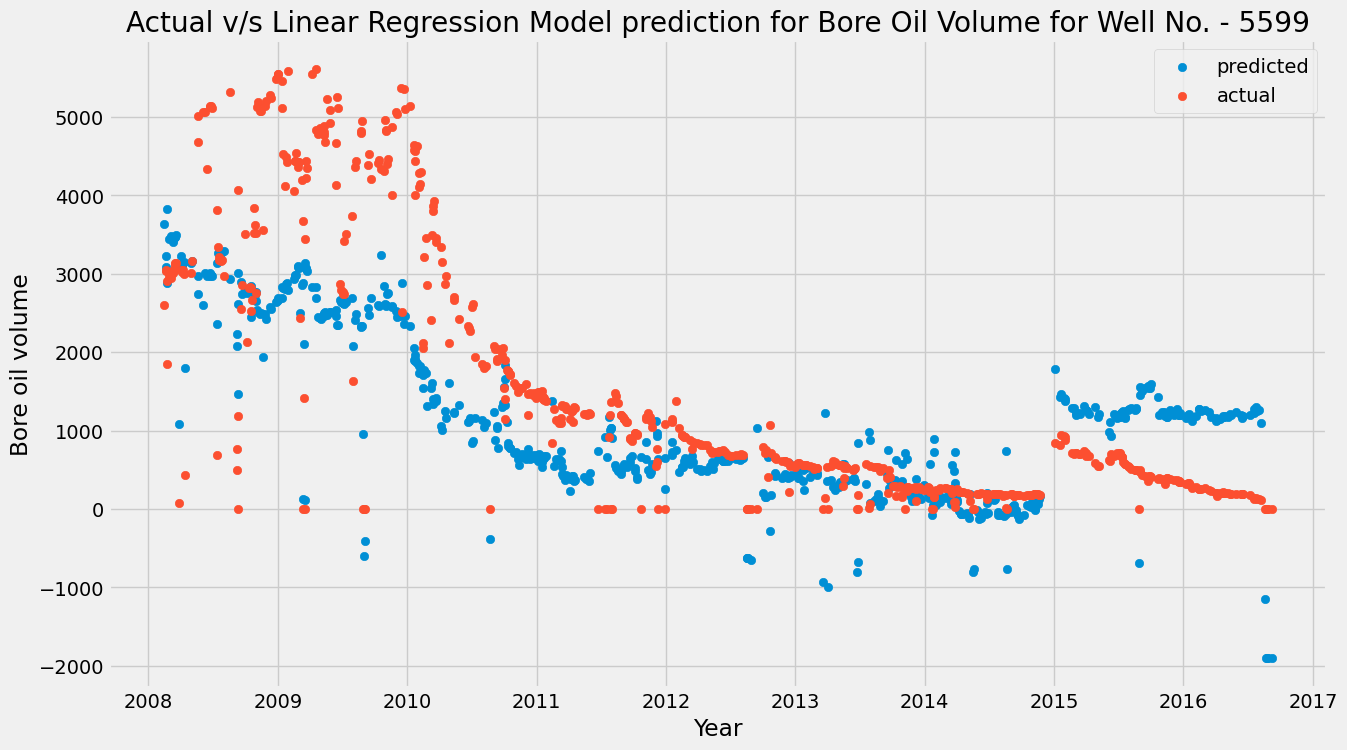

In [ ]:
y_pred = reg_all.predict(x_test_5599final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_pred,label='predicted',)
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5599')

y_test_5599_final = y_test_5599['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 5599 is", reg_all.score(x_test_5599final,y_test_5599_final ))

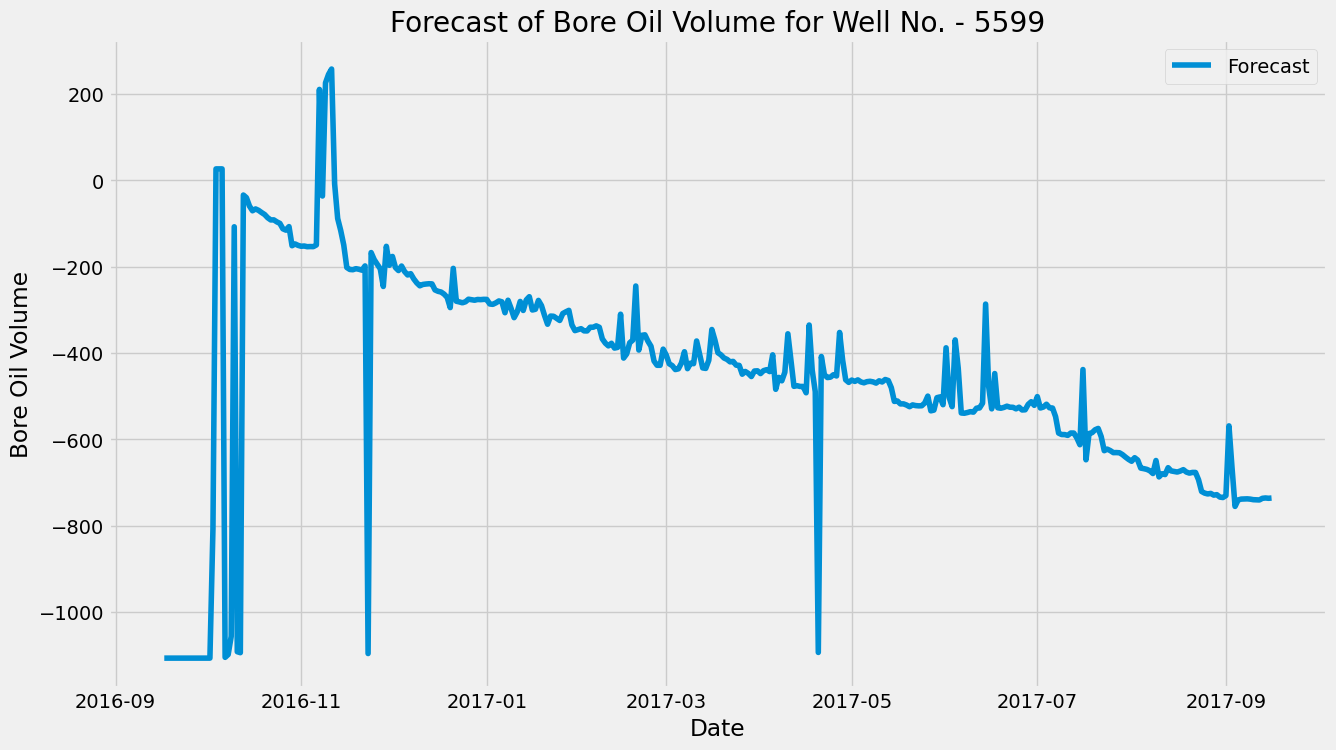

In [ ]:
# Get the last date in the dataset
last_date = fdf['DATEPRD'].max()

# Generate dates for the next year
dates = pd.date_range(last_date, periods=365, freq='D').tolist()

# Create a DataFrame to store the predicted oil volumes
predictions_df = pd.DataFrame({'DATEPRD': dates})

# Prepare the features for prediction
x_pred = predictions_df.merge(fdf.drop('BORE_OIL_VOL', axis=1), how='cross')
x_pred = x_pred.drop(['DATEPRD_x', 'DATEPRD_y','NPD_WELL_BORE_CODE'], axis=1)

# Scale the features
x_pred[['ON_STREAM_HRS', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P']] = scaler.transform(x_pred[['ON_STREAM_HRS', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P']])

# Make predictions
y_pred = reg_all.predict(x_pred)

# Add the predicted oil volumes to the DataFrame
predictions_df['BORE_OIL_VOL'] = pd.Series(y_pred)

# Plot the forecasted oil volumes
plt.figure(figsize=(14, 8))
plt.plot(predictions_df['DATEPRD'], predictions_df['BORE_OIL_VOL'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Bore Oil Volume')
plt.title('Forecast of Bore Oil Volume for Well No. - 5599')
plt.legend()
plt.show()

